In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = "raw_data/"
PATH_OUT = "preprocessed_data/"

## Data Cleaning and Preparation
Johns Hopkins CSSE's global confirmed cases data is organized by Country/Region. In particular, the data for Australia, Canada, and China is reported at the province level. Let's aggregate all global confirmed cases and deaths data by country only. 

### Global Confirmed Case Count

In [2]:
timeseries_confirmed_df = pd.read_csv(PATH_IN + "time_series_covid19_confirmed_global.csv")

# Create new file aggregating confirmed case count by country instead of by "Country/Region"
fout = open(PATH_OUT + "time_series_covid19_confirmed_by_country.csv",'w')
fout.write("Country")
dates = timeseries_confirmed_df.columns[4:]

for date in dates:
    fout.write("," + date)
fout.write("\n")

countries = list(timeseries_confirmed_df["Country/Region"].value_counts().index)
for country in countries:
    if "," in country:
        fout.write("\"" + country + "\"")
    else:
        fout.write(country)
    for date in dates:
        count = np.sum(np.array(timeseries_confirmed_df.set_index("Country/Region").loc[country, date]))
        fout.write("," + str(count))
    fout.write("\n")
fout.close()

### Global Death Toll

In [33]:
### Construct time series `dataframe` for deaths by country

timeseries_deaths_df = pd.read_csv(PATH_IN + "time_series_covid19_deaths_global.csv")

# Create new file aggregating confirmed case count by country instead of by "Country/Region"
fout = open(PATH_OUT + "time_series_covid19_deaths_by_country.csv",'w')
fout.write("Country")
dates = timeseries_deaths_df.columns[4:]
print(dates)

for date in dates:
    fout.write("," + date)
fout.write("\n")

countries = list(timeseries_deaths_df["Country/Region"].value_counts().index)

for country in countries:
    if "," in country:
        fout.write("\"" + country + "\"")
    else:
        fout.write(country)
    for date in dates:
        count = np.sum(np.array(timeseries_deaths_df.set_index("Country/Region").loc[country, date]))
        fout.write("," + str(count))
    fout.write("\n")

fout.close()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1919,1935,1945,1956,1965,1969,1995,2011,2025,2030
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,951,965,977,989,1003,1016,1028,1040,1055,1066
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2554,2564,2575,2584,2596,2609,2623,2631,2640,2647
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,78,78,78,78,79,79,79,79,79,80
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,358,362,365,366,371,372,372,379,382,384


Likewise, let's aggregate U.S. confirmed cases and deaths data by states and territories.

### United States Confirmed Case Count

In [4]:
timeseries_confirmed_df = pd.read_csv(PATH_IN + "time_series_covid19_confirmed_US.csv")

fout = open(PATH_OUT + "time_series_covid19_confirmed_by_state.csv",'w')
fout.write("Province_State")
dates = timeseries_confirmed_df.columns[11:]

for date in dates:
    fout.write("," + date)
fout.write("\n")

states = list(timeseries_confirmed_df["Province_State"].value_counts().index)

for state in states:
    fout.write(state)
    for date in dates:
        count = np.sum(np.array(timeseries_confirmed_df.set_index("Province_State").loc[state, date]))
        fout.write("," + str(count))
    fout.write("\n")

fout.close()

### United States Death Toll

In [5]:
timeseries_deaths_df = pd.read_csv(PATH_IN + "time_series_covid19_deaths_US.csv")

fout = open(PATH_OUT + "time_series_covid19_deaths_by_state.csv",'w')
fout.write("Province_State")
dates = timeseries_deaths_df.columns[12:]

for date in dates:
    fout.write("," + date)
fout.write("\n")

states = list(timeseries_deaths_df["Province_State"].value_counts().index)

for state in states:
    fout.write(state)
    for date in dates:
        count = np.sum(np.array(timeseries_deaths_df.set_index("Province_State").loc[state, date]))
        fout.write("," + str(count))
    fout.write("\n")

fout.close()

## Data Exploration

Let's take a look at country-by-country and US state-by-state confirmed cases and deaths DateFrames.

In [6]:
timeseries_country_cases_df = pd.read_csv(PATH_OUT + "time_series_covid19_confirmed_by_country.csv")
timeseries_country_cases_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,China,548,643,920,1406,2075,2877,5509,6087,8141,...,93898,94025,94124,94217,94328,94427,94537,94626,94734,94821
1,Canada,0,0,0,0,1,1,2,2,2,...,439142,445828,452543,458527,464443,472820,479064,485576,492582,499282
2,France,0,0,2,3,3,3,4,5,5,...,2379718,2393590,2407079,2407079,2432559,2435751,2447406,2465126,2483524,2499529
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,1771545,1792611,1814395,1835949,1854490,1874867,1893436,1918736,1954268,1982828
4,Australia,0,0,0,0,4,5,5,6,9,...,28000,28011,28025,28030,28037,28048,28060,28072,28093,28126


In [7]:
timeseries_state_cases_df = pd.read_csv(PATH_OUT + "time_series_covid19_confirmed_by_state.csv")
timeseries_state_cases_df.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,Texas,0,0,0,0,0,0,0,0,0,...,1427441,1443353,1459415,1472853,1481899,1491942,1512531,1534450,1551749,1569032
1,Georgia,0,0,0,0,0,0,0,0,0,...,517779,525402,531593,538040,542838,546558,553995,560619,568396,576537
2,Virginia,0,0,0,0,0,0,0,0,0,...,267128,271043,274438,278615,281909,285149,288309,292240,296093,299388
3,Kentucky,0,0,0,0,0,0,0,0,0,...,209135,213449,217119,220659,223103,224889,227817,230692,234020,237189
4,Missouri,0,0,0,0,0,0,0,0,0,...,338336,342418,343412,350388,353178,356107,359022,361888,365678,369241


In [8]:
timeseries_country_deaths_df = pd.read_csv(PATH_OUT + "time_series_covid19_deaths_by_country.csv")
timeseries_country_deaths_df.tail()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
186,Gabon,0,0,0,0,0,0,0,0,0,...,62,62,63,63,63,63,63,63,63,64
187,Andorra,0,0,0,0,0,0,0,0,0,...,78,78,78,78,79,79,79,79,79,80
188,Diamond Princess,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
189,Albania,0,0,0,0,0,0,0,0,0,...,951,965,977,989,1003,1016,1028,1040,1055,1066
190,Marshall Islands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
timeseries_state_deaths_df = pd.read_csv(PATH_OUT + "time_series_covid19_deaths_by_state.csv")
timeseries_state_deaths_df.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,Texas,0,0,0,0,0,0,0,0,0,...,23672,23883,24120,24308,24400,24440,24648,24920,25177,25522
1,Georgia,0,0,0,0,0,0,0,0,0,...,9921,9975,10031,10075,10076,10104,10160,10228,10294,10332
2,Virginia,0,0,0,0,0,0,0,0,0,...,4281,4335,4370,4409,4411,4414,4470,4508,4553,4598
3,Kentucky,0,0,0,0,0,0,0,0,0,...,2118,2146,2168,2192,2207,2224,2239,2262,2316,2344
4,Missouri,0,0,0,0,0,0,0,0,0,...,4470,4544,4551,4602,4609,4613,4837,4900,4951,4978


## Data Visualizations

Let's plot the time series of the absolute number of cases in each US state/territory.

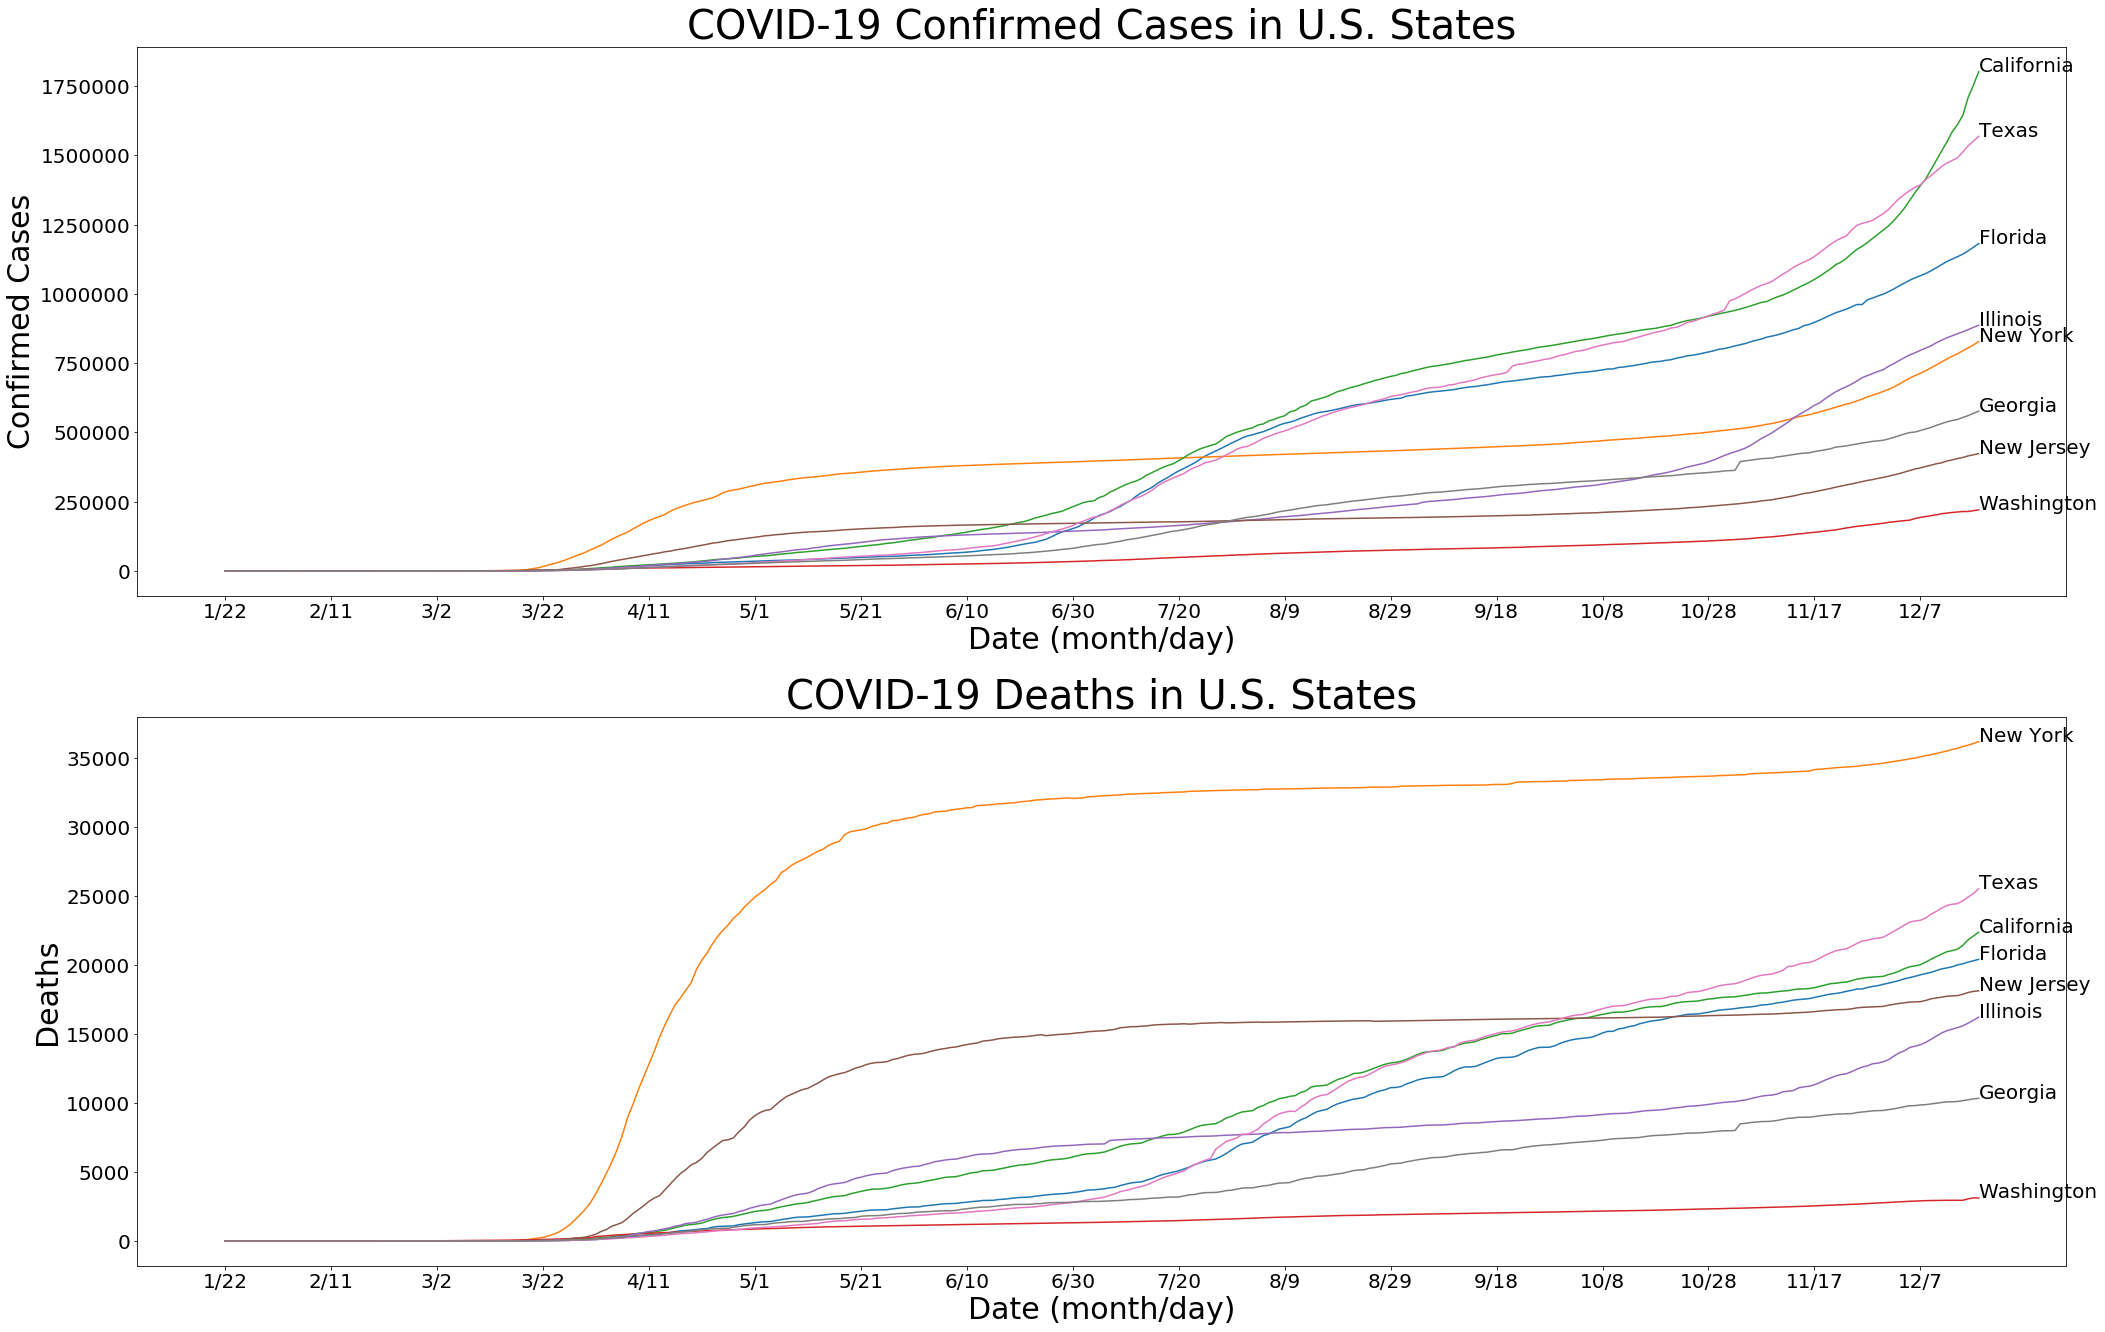

In [74]:
dates =  np.array(timeseries_state_cases_df.columns)[1:]
dates_abbrev = []
for date in dates:
    dates_abbrev.append(date[:-3])
mindate = 0
maxdate = 213

fig, ax = plt.subplots(2, figsize=(30, 20))
fig.tight_layout(pad=10)

states = ["Florida", "New York", "California", "Washington", "Illinois", "New Jersey", "Texas", "Georgia"]

for state in states:
    cases = np.array(timeseries_state_cases_df.set_index('Province_State').loc[state])
    deaths = np.array(timeseries_state_deaths_df.set_index('Province_State').loc[state])

    ax[0].plot(dates_abbrev, cases)
    ax[0].set_xlabel("Date (month/day)", size=30)
    ax[0].set_ylabel("Confirmed Cases", size=30)
    ax[0].set_xticks(range(0, len(dates), 20))
    ax[0].tick_params(labelsize=20)
    ax[0].set_title("COVID-19 Confirmed Cases in U.S. States", size=40)
    ax[0].annotate(state, (dates_abbrev[-1], cases[-1]), size=20)
    
    ax[1].plot(dates_abbrev, deaths)
    ax[1].set_xlabel("Date (month/day)", size=30)
    ax[1].set_ylabel("Deaths", size=30)
    ax[1].set_xticks(range(0, len(dates), 20))
    ax[1].tick_params(labelsize=20)
    ax[1].set_title("COVID-19 Deaths in U.S. States", size=40)
    ax[1].annotate(state, (dates_abbrev[-1], deaths[-1]), size=20)

plt.savefig("images/line_graph_us_states.jpg")
plt.show()

Let's create similar line plots tracking the absolute number of several major countries' total confirmed cases and deaths.

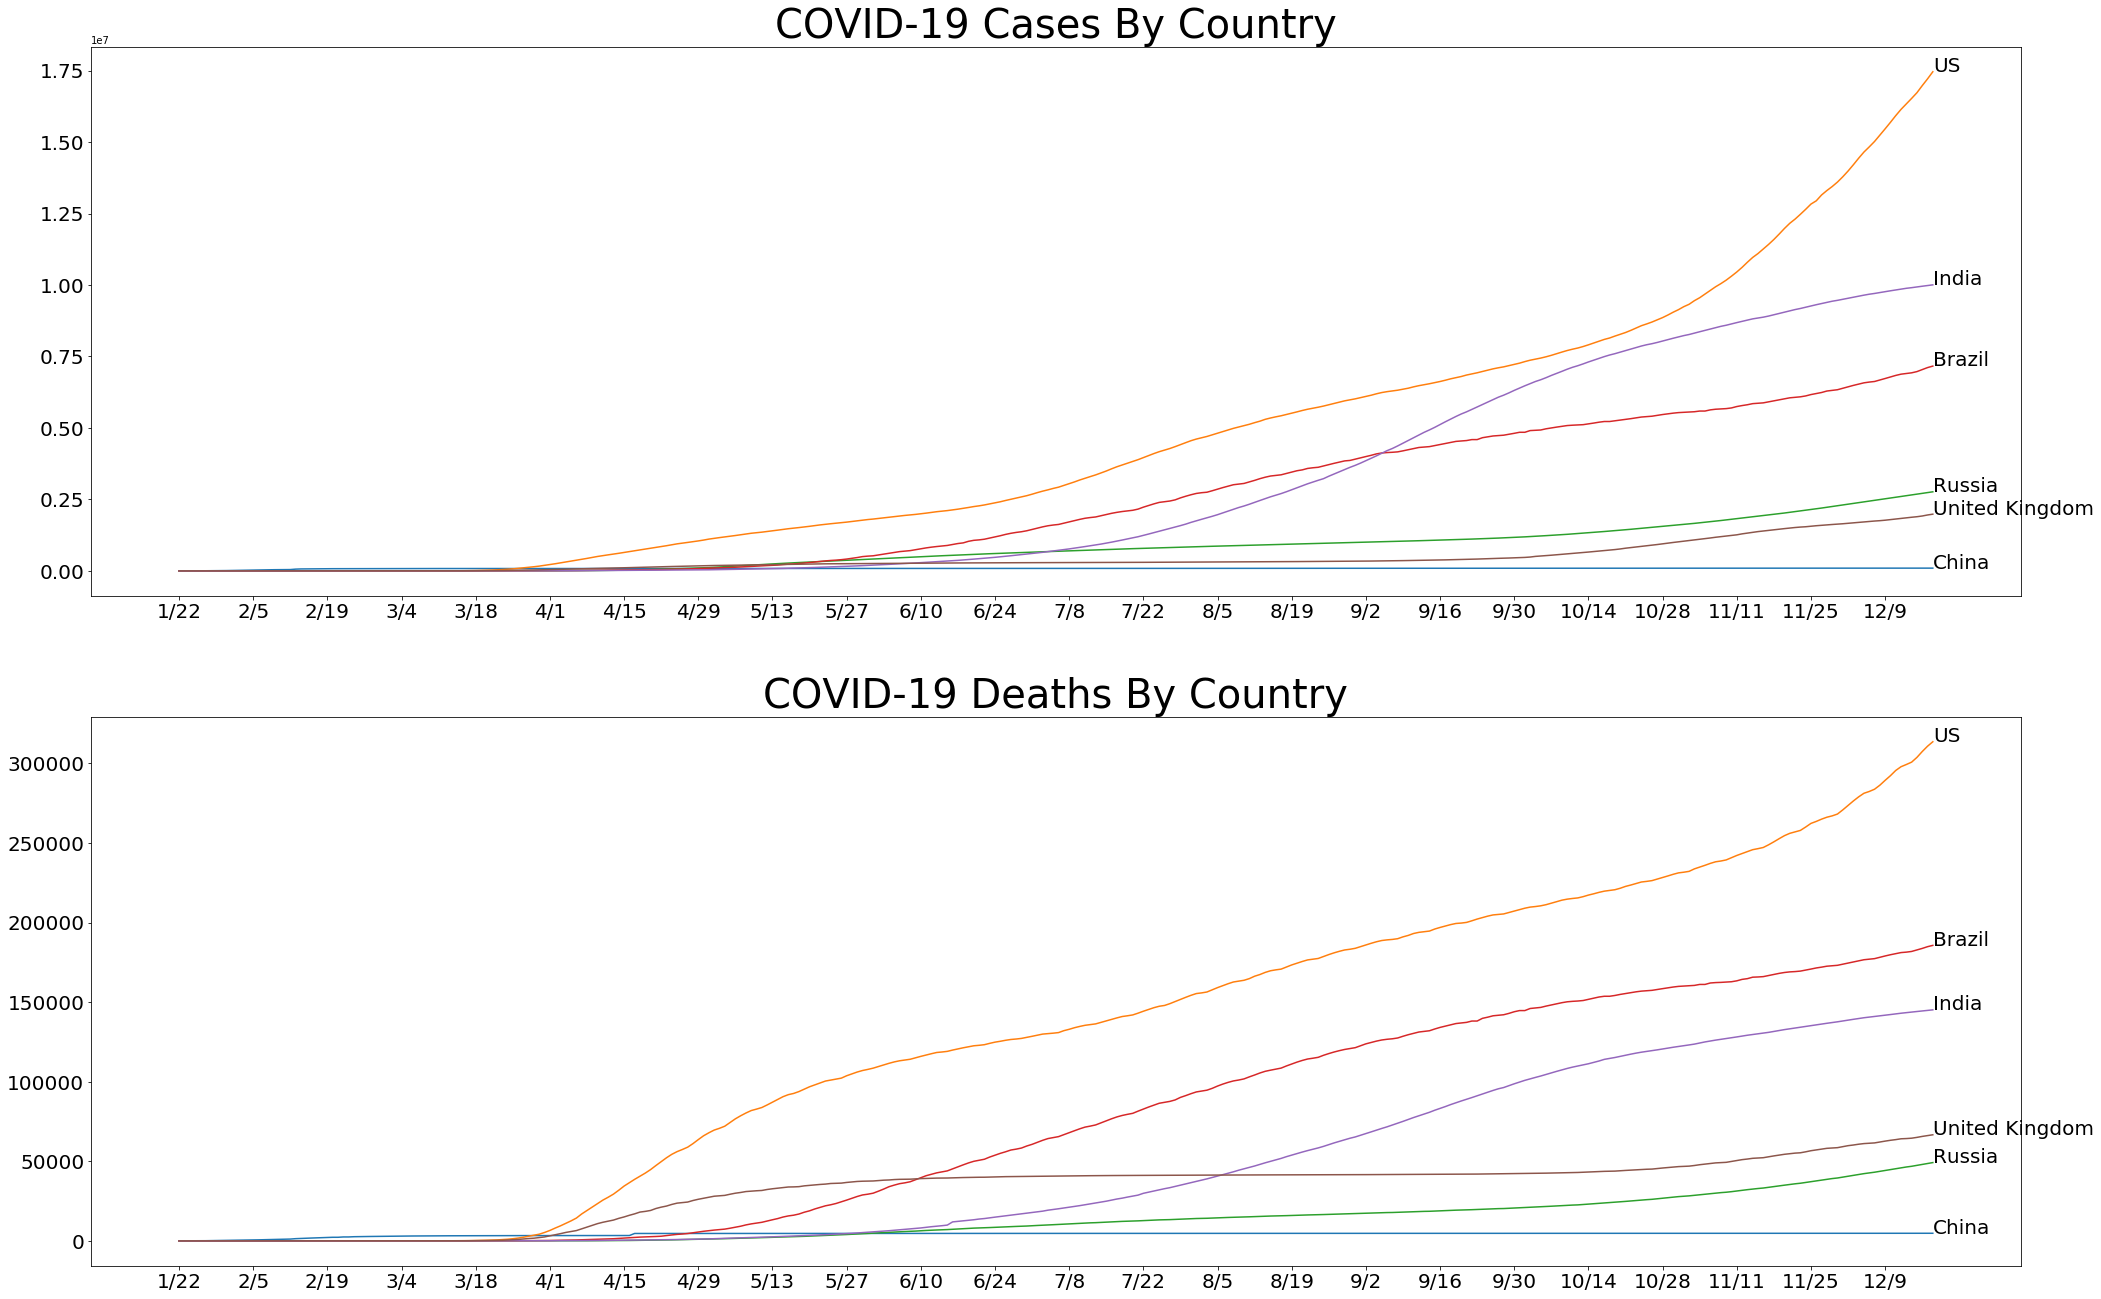

In [82]:
dates =  np.array(timeseries_country_cases_df.columns)[1:]
dates_abbrev = []
for date in dates:
    dates_abbrev.append(date[:-3])

fig, ax = plt.subplots(2, figsize=(30, 20))
fig.tight_layout(pad=10)

countries = ["China", "US", "Russia", "Brazil", "India", "United Kingdom"]

for country in countries:
    
    cases = np.array(timeseries_country_cases_df.set_index('Country').loc[country])
    ax[0].plot(dates_abbrev, cases)
    ax[0].annotate(country, (dates_abbrev[-1], cases[-1]), size=20)
    ax[0].set_xticks(range(0, len(dates), 14))
    ax[0].tick_params(labelsize=20)
    ax[0].set_title("COVID-19 Cases By Country", size=40)
    
    deaths = np.array(timeseries_country_deaths_df.set_index('Country').loc[country])
    ax[1].plot(dates_abbrev, deaths)
    ax[1].annotate(country, (dates_abbrev[-1], deaths[-1]), size=20) 
    ax[1].set_xticks(range(0, len(dates), 14))
    ax[1].tick_params(labelsize=20)
    ax[1].set_title("COVID-19 Deaths By Country", size=40)

plt.savefig("images/line_graph_countries.jpg")
plt.show()

Let's create some pie charts to portray confirmed COVID-19 cases by country, month by month, just to put in perspective which countries have been affected the most in the world.

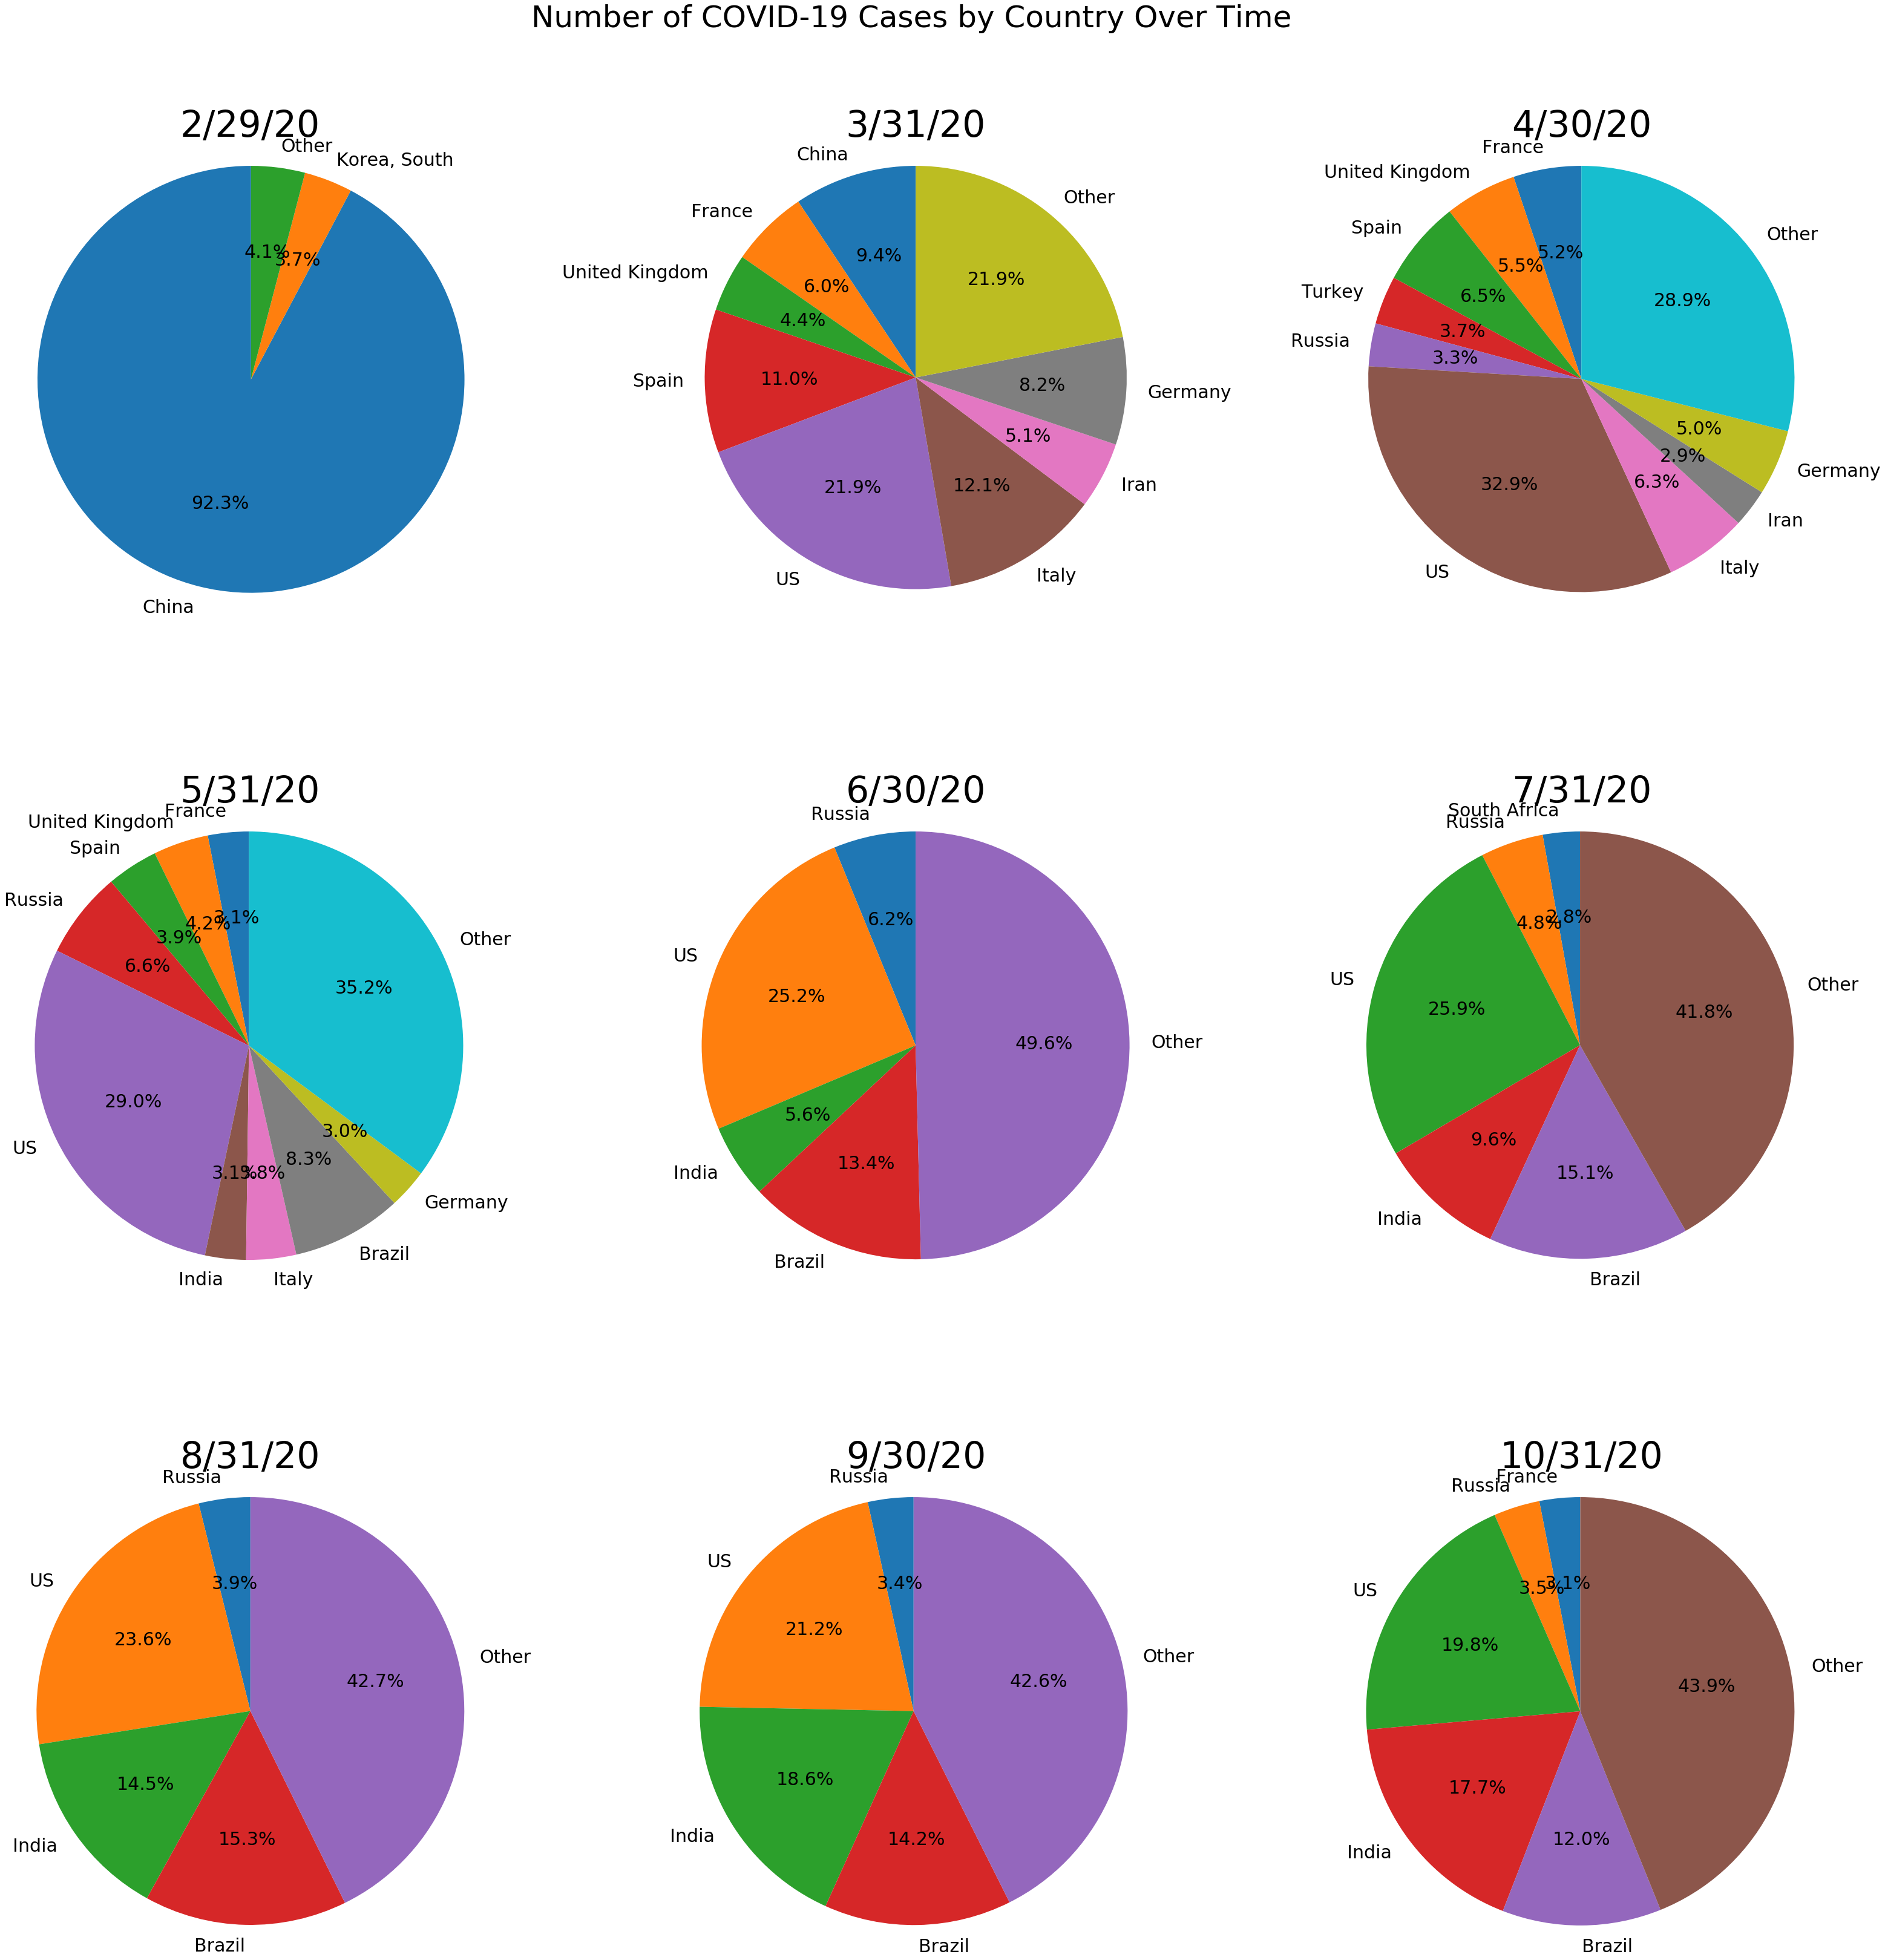

In [85]:
min_proportion = 0.028
days_per_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

fig, ax = plt.subplots(3, 3, figsize=(50, 50))
fig.tight_layout(pad=30)
fig.suptitle("Number of COVID-19 Cases by Country Over Time", size=50)

for i in range(3):
    for j in range(3):
        sum = 0
    
        labels = []
        values = []
        month_index = i*3 + j
        
        total_cases = 0
        for k in range(len(timeseries_country_cases_df)):
            date = str(month_index + 2) + "/" + str(days_per_month[month_index + 1]) + "/20"
            total_cases += timeseries_country_cases_df.loc[k, date]

        other_cases = 0

        for k in range(len(timeseries_country_cases_df)):
            date = str(month_index + 2) + "/" + str(days_per_month[month_index + 1]) + "/20"
            if timeseries_country_cases_df.loc[k,date] / total_cases > min_proportion:
                labels.append(timeseries_country_cases_df.loc[k, "Country"])
                values.append(timeseries_country_cases_df.loc[k, date])
            else:
                other_cases += timeseries_country_cases_df.loc[k, date]
    
        labels.append("Other")
        values.append(other_cases)
        ax[i][j].set_title(str(date), size=60)
        ax[i][j].pie(values, labels=labels, autopct='%1.1f%%', textprops= {'fontsize': 30}, startangle=90)
        ax[i][j].axis('equal')

plt.savefig("images/pie_chart_countries.jpg")
plt.show()

Next, let's create a similar sequence of pie charts for US cases, separated by state/territory.

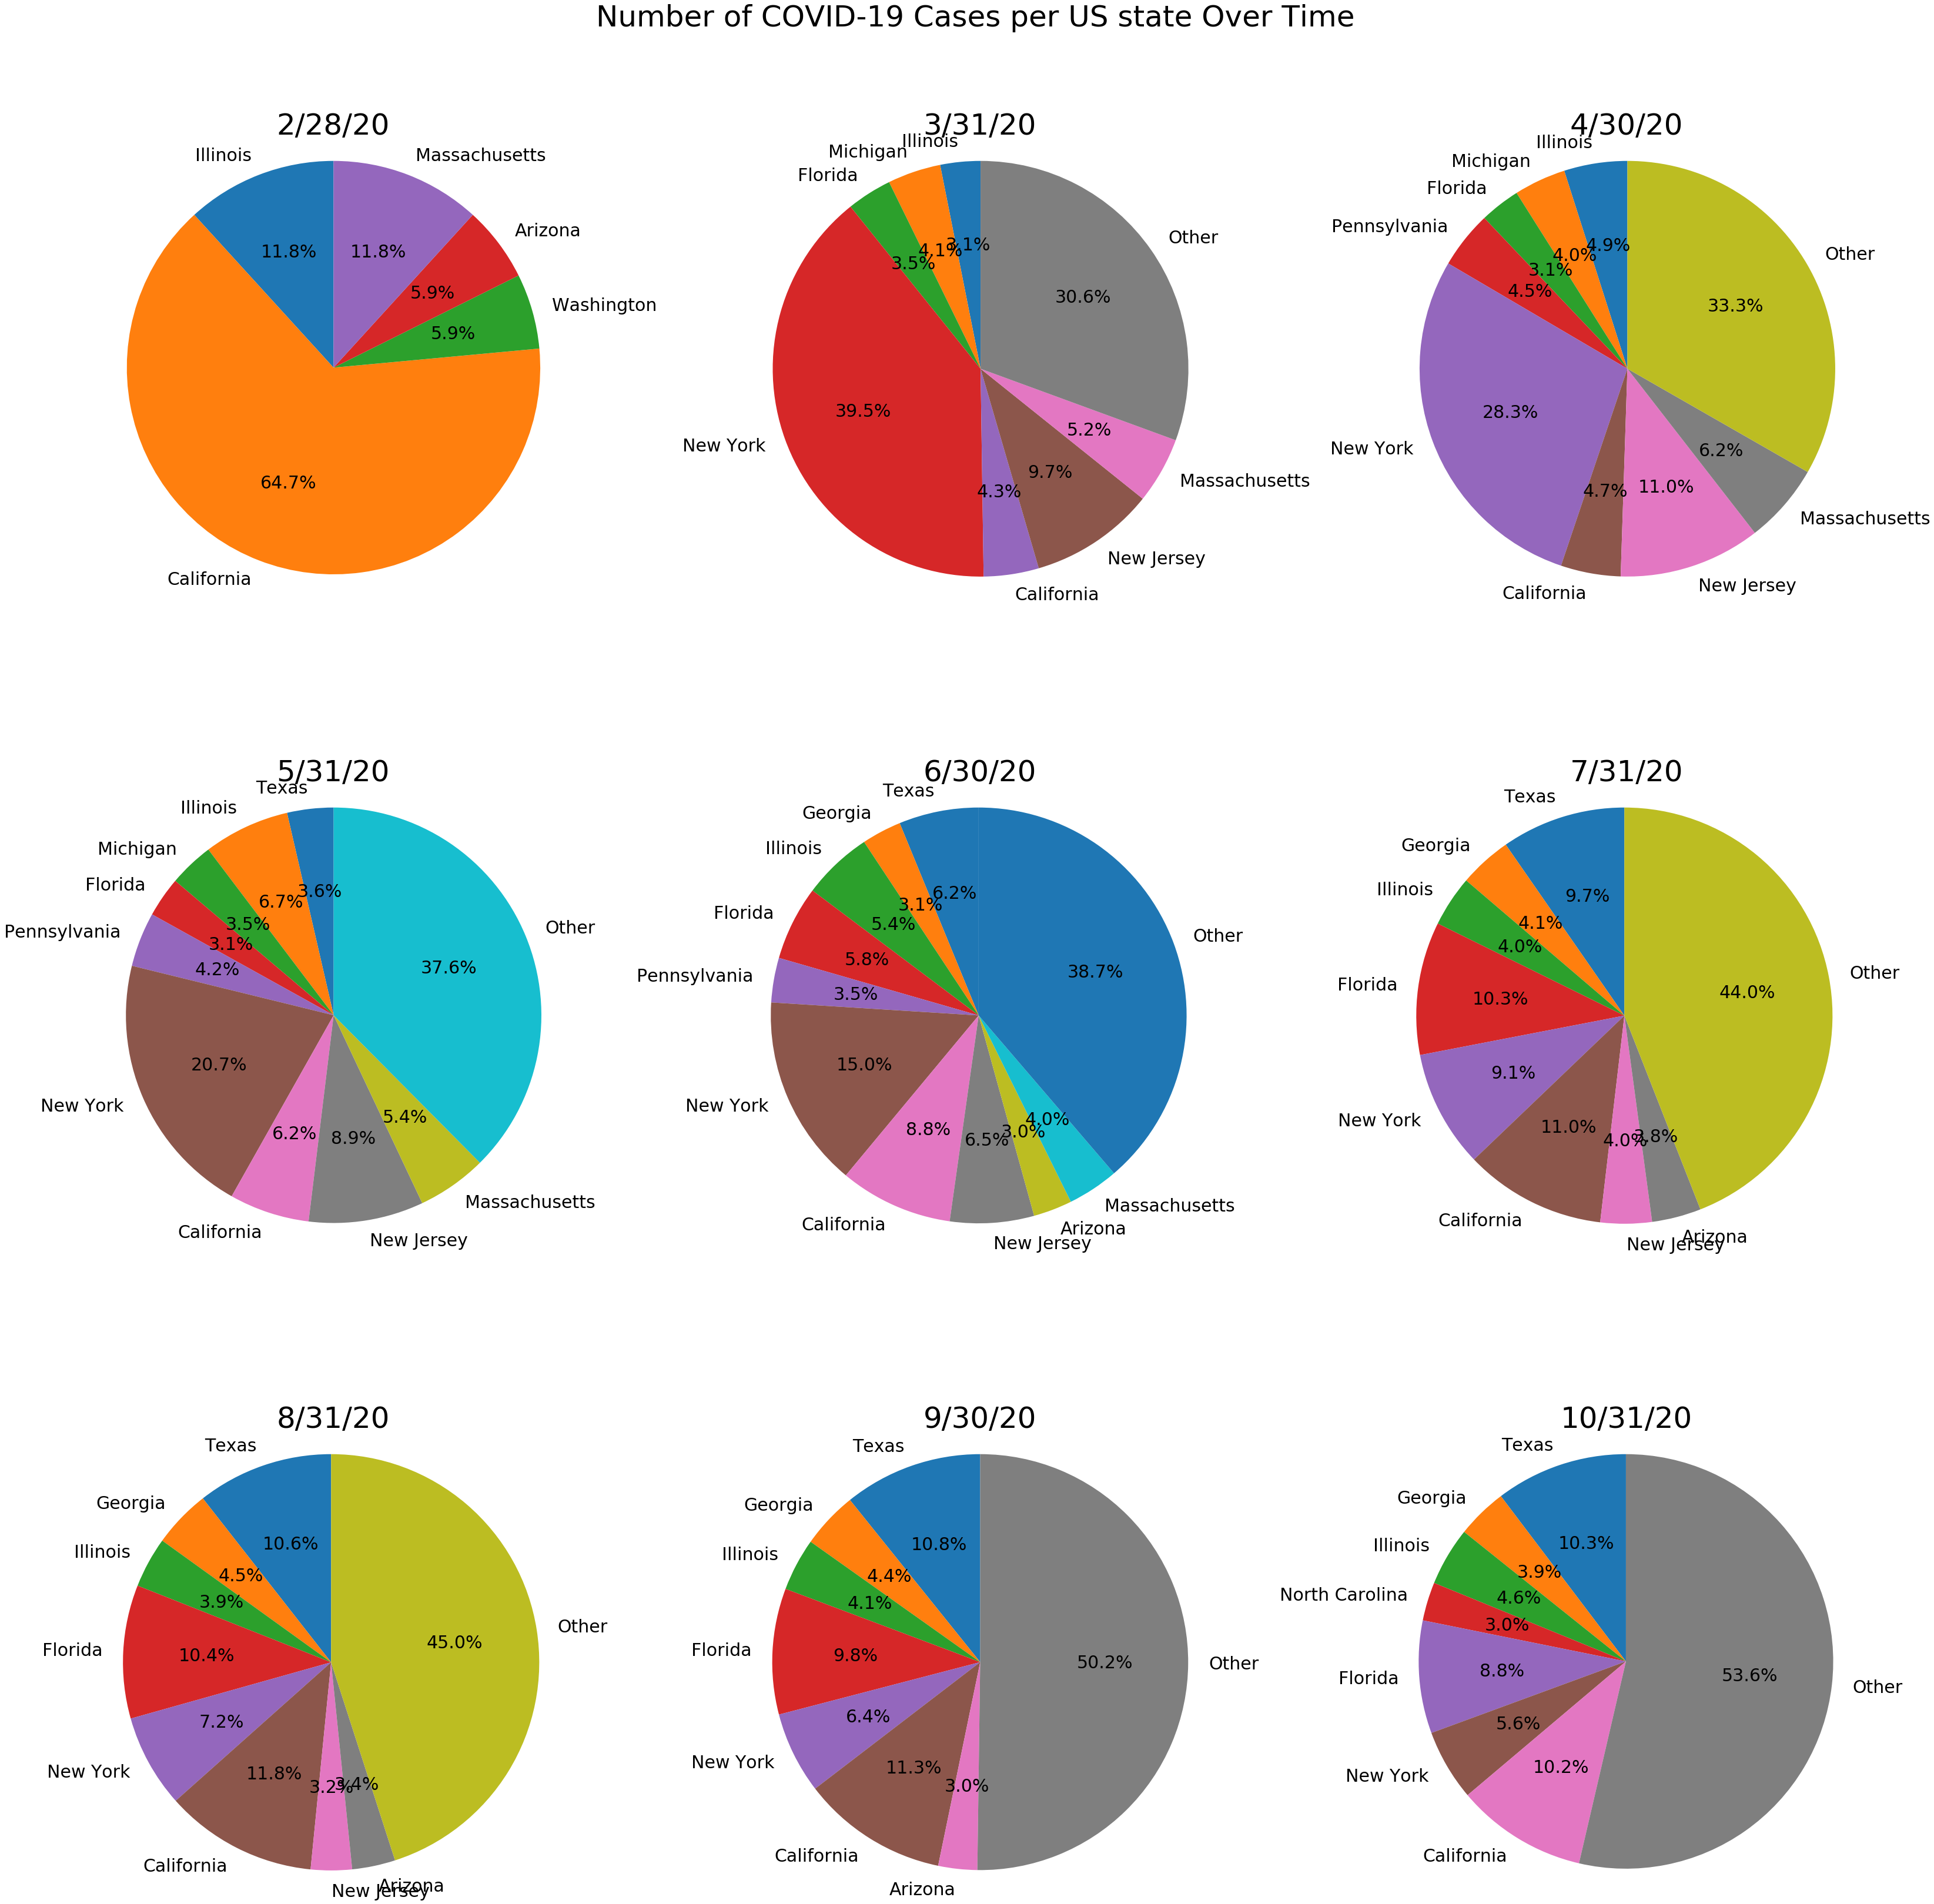

In [87]:
min_proportion = 0.03
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

fig, ax = plt.subplots(3, 3, figsize=(50, 50))
fig.tight_layout(pad=30)
fig.suptitle("Number of COVID-19 Cases per US state Over Time", size=50)

for i in range(3):
    for j in range(3):
    
        labels = []
        values = []
        month_index = i*3 + j
        
        total_cases = 0
        for k in range(len(timeseries_state_cases_df)):
            date = str(month_index+2) + "/" + str(days_per_month[month_index+1]) + "/20"
            total_cases += timeseries_state_cases_df.loc[k, date]
        
        other_cases = 0
        for k in range(len(timeseries_state_cases_df)):
            if timeseries_state_cases_df.loc[k, date] / total_cases > min_proportion:
                labels.append(timeseries_state_cases_df.loc[k, "Province_State"])
                values.append(timeseries_state_cases_df.loc[k, date])
            else:
                other_cases += timeseries_state_cases_df.loc[k, date]
        
        if other_cases / total_cases > min_proportion:
            labels.append("Other")
            values.append(other_cases)
        
        ax[i][j].set_title(str(date), size=50)
        ax[i][j].pie(values, labels=labels, autopct='%1.1f%%', textprops = {'fontsize': 30}, startangle = 90)
        ax[i][j].axis('equal')

plt.savefig("images/pie_chart_us_states.jpg")
plt.show()